In [14]:
import yfinance as yf
import pandas as pd

In [15]:
# Load historical data in the past 10 years
sp500 = yf.Ticker("^GSPC")
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=10*365)
sp500_history=sp500.history(start=start_date, end=end_date)

In [16]:
# Remove unnecessary columns
sp500_history = sp500_history.drop(columns=['Dividends', 'Stock Splits'])

In [17]:
# Create a new column as Close 200 days moving average
sp500_history['Close_200ma'] = sp500_history['Close'].rolling(200).mean()

In [18]:
# Create a summary statistics table
sp500_history_summary = sp500_history.describe()

In [19]:
sp500_history

,Open,High,Low,Close,Volume,Close_200ma
Date,,,,,,
2013-10-21 00:00:00-04:00,1745.199951,1747.790039,1740.670044,1744.660034,3052710000,NaN
2013-10-22 00:00:00-04:00,1746.479980,1759.329956,1746.479980,1754.670044,3850840000,NaN
2013-10-23 00:00:00-04:00,1752.270020,1752.270020,1740.500000,1746.380005,3713380000,NaN
2013-10-24 00:00:00-04:00,1747.479980,1753.939941,1745.500000,1752.069946,3671700000,NaN
2013-10-25 00:00:00-04:00,1756.010010,1759.819946,1752.449951,1759.770020,3175720000,NaN
...,...,...,...,...,...,...
2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4216.041903
2023-10-12 00:00:00-04:00,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,4218.565852
2023-10-13 00:00:00-04:00,4360.490234,4377.100098,4311.970215,4327.779785,0,4221.058501


In [20]:
sp500_history_summary

,Open,High,Low,Close,Volume,Close_200ma
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2316.000000
mean,2950.975199,2966.956167,2933.731213,2951.407443,3.932735e+09,2940.710439
std,890.512776,896.887867,883.953269,890.634639,9.720219e+08,834.242872
min,1743.819946,1747.790039,1737.920044,1741.890015,0.000000e+00,1861.044848
25%,2103.875000,2111.834961,2095.244995,2104.459961,3.339825e+09,2097.516419
50%,2766.149902,2775.989990,2747.860107,2759.820068,3.750400e+09,2763.617074
75%,3835.890015,3859.849976,3802.390015,3829.295044,4.296200e+09,3830.355109
max,4804.509766,4818.620117,4780.040039,4796.560059,9.976520e+09,4496.905588


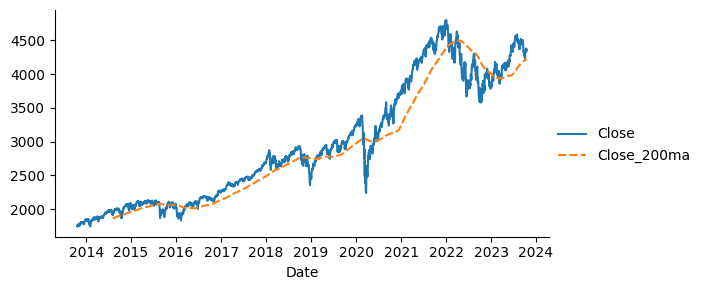

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(data=sp500_history[['Close', 'Close_200ma']], kind='line', height=3, aspect=2.0)
plt.savefig('chart.png')

In [22]:
page_title_text='My report'
title_text = 'Daily S&P 500 prices report'
text = 'Hello, welcome to your report!'
prices_text = 'Historical prices of S&P 500'
stats_text = 'Historical prices summary statistics'

In [23]:
# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='chart.png' width="700">
            <h2>{prices_text}</h2>
            {sp500_history.tail(3).to_html()}
            <h2>{stats_text}</h2>
            {sp500_history_summary.to_html()}
        </body>
    </html>
    '''

In [24]:
# 3. Write the html string as an HTML file
with open('html_report.html', 'w') as f:
    f.write(html)